Cross-validation scores of the features: [0.94117647 0.8125     0.875      0.6875     0.8125    ]
Mean score of the set: 0.8257352941176471
Standard Deviation score of the set: 0.08392022286808093
Accuracy score of training data: 0.9135802469135802
Accuracy score of the model from the testing set is 0.9382716049382716


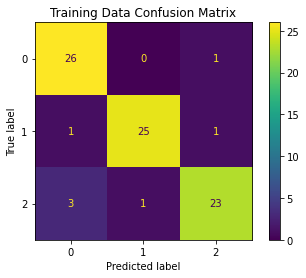

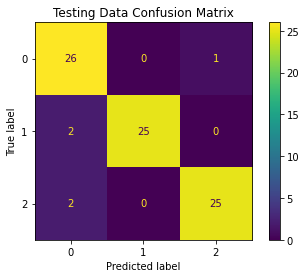

In [152]:
import numpy as np
from PIL import Image
from numpy import asarray
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import sqrt 
from PIL import Image,ImageFilter,ImageEnhance
from sklearn import datasets, svm, metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os, os.path
import cv2

#initialize scaler parameter for testing

scaler = StandardScaler()

#dataset pathways
folder_training= #(add the folder pathway for the dataset) 
folder_testing= #(add the folder pathway for the dataset)

#training model
model = training(folder_training)

# testing function
testing(folder_testing,model,scaler)

In [145]:
def feature_extraction(img):#This is a function that extracts the features from the images
    grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)# Convert image to grayscale format and then resize it to 64x64px
    resizedImage = cv2.resize(grayImage, (64, 64))
    edgeDetector= cv2.Canny(resizedImage, 50,100,3)    # Use the Canny edge detection program to extract edges, edge detection
    contour, _ = cv2.findContours(edgeDetector, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # Find contours in the image
    if len(contour) > 0: # Identify the largest contour 
        con = max(contour, key=cv2.contourArea)
    else:
        return None
    # Obtain the Hu moments of the contour thats fitted in the ellipse
    moment = cv2.moments(con)
    hu_moment = cv2.HuMoments(moment)
    e = cv2.fitEllipse(con)# Fit an ellipse into the contour
    a, b = e[1] # Obtain features from the ellipse that identify with the contour
    perimeter = 2*np.pi*((a**2 + b**2)/2)**0.5
    area = np.pi*a*b
    orientation = e[2]
    eccentricity = (1-(b/a))**0.5
    # Return extracted features 
    return [float(perimeter.real),float(area.real) ,float(orientation.real) ,float(eccentricity.real)]

In [151]:
# get the data images from the testing and training datasets

def get_data(folder):
    file_path = os.listdir(folder)  #sort the file names
    count = len(file_path)   #count of items in filepath
    x = np.empty((count,4)) #feature empty array
    y = np.empty((count,1))  #label empty array                 
    for i in range(count):               #loop through each file
        path = folder + '/' + file_path[i]
        image1 = cv2.imread(path)                # Read the image
        image1 = cv2.addWeighted(image1, 1.0, np.zeros(image1.shape, image1.dtype), 0, 30) #adjust brightness of the image
        # label decision loop 0 = Rectangle, 1 = Square, 2 = Circle
        if 'cir' in file_path[i]:
            y[i,0] = 0
        elif 'rec' in file_path[i]:
            y[i,0] = 1
        elif 'squ' in file_path[i]:
            y[i,0] = 2
        else:
            print("file invalid" + " " )
    # Extract the features from each image
        feature = feature_extraction(image1)
        if feature is not None:
            x[i,:] = feature               # keep the extracted features in x
        else:
            x[i,:] = np.zeros((1,4))          # If no features can be extrated then store empty array of 0
    return x, y

In [146]:

def training(folder):
    x_train, y_train = get_data(folder)#get the feature extracted trained dataset
    # Normalize training data
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    model = LogisticRegression(max_iter=200000)
    # Use k-fold cross-validation to evaluate the model whether the features extracted creat awell trained model.
    kfold = KFold(n_splits=5, shuffle=True)
    scores = cross_val_score(model, x_train, np.ravel(y_train), cv=kfold)
    print(f'Cross-validation scores of the features: {scores}')
    print(f'Mean score of the set: {np.mean(scores)}')
    print(f'Standard Deviation score of the set: {np.std(scores)}')
    # Fit the model to training data
    model.fit(x_train, np.ravel(y_train))
    # Calculate the model performance on training data
    xpred = model.predict(x_train)
    print(f'Accuracy score of training data: {accuracy_score(y_train, xpred)}')
    conf_matrix = confusion_matrix(y_train,xpred)                           
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)   
    disp.plot()                                                                                 
    disp.ax_.set_title('Training Data Confusion Matrix') 
    return model

In [147]:

def testing(folder_training, model, scalar):#testing functon 
    x_test, y_test = get_data(folder_training)#get the feature extracted x_test and y_test from the dataset
    scaler = StandardScaler() #normalize the x_test 
    x_test = scaler.fit_transform(x_test)
    y_pred = model.predict(x_test)#predict the output based on the fitted model and the feature extracted x test
    acc_score= accuracy_score(y_test, y_pred) #calculate model performance on the testing data
    print(f'Accuracy score of the model from the testing set is {acc_score}')
    conf_matrix = confusion_matrix(y_test,y_pred)                           #calculate the confustion matrix from the test class labels to the predicted class labels
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)   #display the confustion matrix as an formatted image with true label vertically and the predicated label horizontally
    disp.plot()                                                                                 #plot the confusion matrix
    disp.ax_.set_title('Testing Data Confusion Matrix')                                         # set the title for the confusion matrix
  
    
    
